In [1]:
import math as ma
import numpy as np
import matplotlib.pyplot as plt
from os.path import expanduser

from wlenet import config
from wlenet.misc.gpu import avoid_gpu_in_this_process; avoid_gpu_in_this_process()
from wlenet.cluster.cluster_lensing import ClusterLensing
from wlenet.cluster.cluster_survey import ClusterSurvey

In [2]:
save_figures_and_tables = True

In [3]:
%%capture
survey = ClusterSurvey()
survey.process_survey(parallel=True)

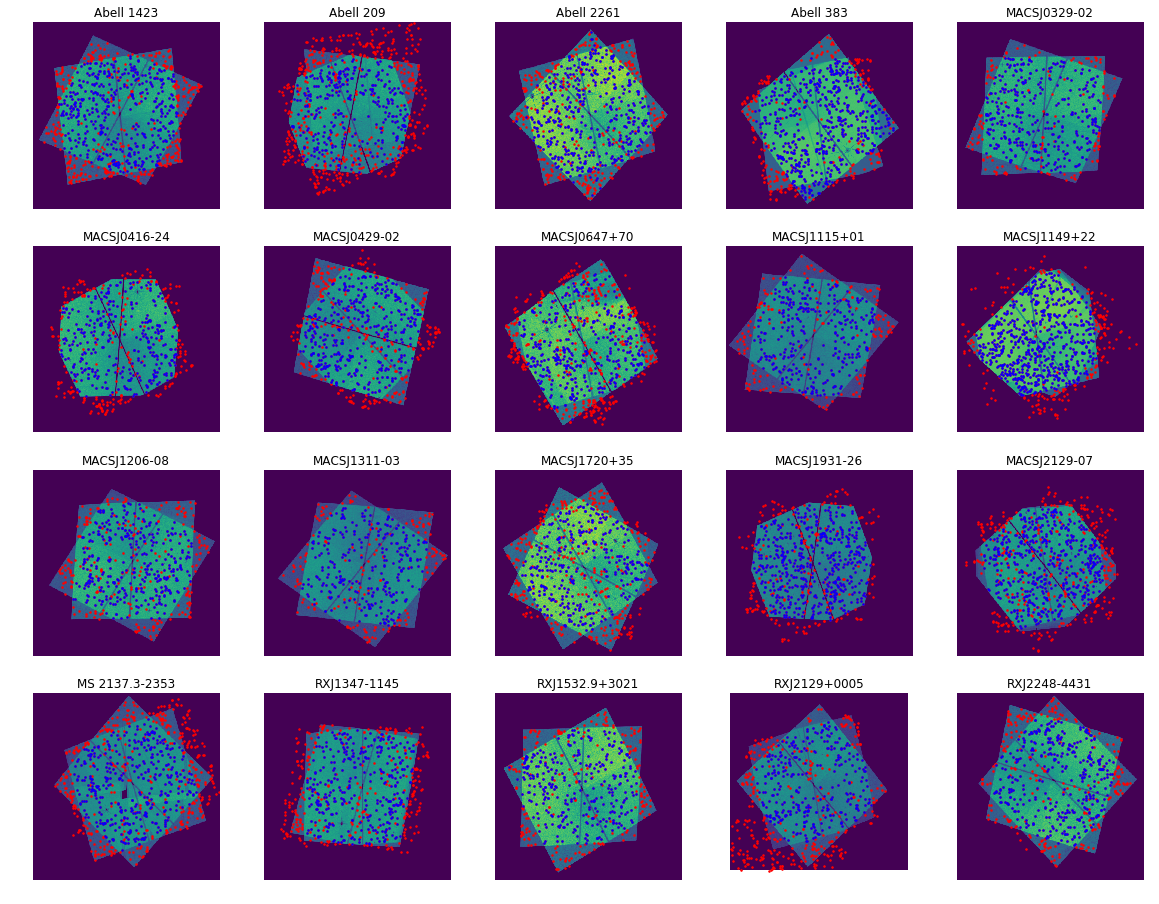

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,24))
for i, cluster in enumerate(survey.clusters):
    plt.subplot(6, 5, i+1)
    plt.imshow(cluster.image_wht_mini, clim=[0, 140000])
    plt.plot(cluster.full['xy'][:,0]/10, cluster.full['xy'][:,1]/10, '.r', markersize=3)
    plt.plot(cluster.cut['xy'][:,0]/10, cluster.cut['xy'][:,1]/10, '.b', markersize=3)
    plt.title(cluster.full_name)
    plt.axis('off')

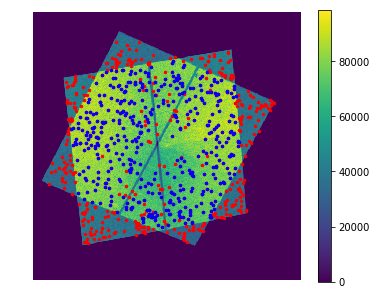

In [5]:
cluster = survey.clusters[0]
fig = plt.figure(figsize=(6,5))
plt.imshow(cluster.image_wht_mini)
plt.colorbar()
plt.plot(cluster.full['xy'][:,0]/10, cluster.full['xy'][:,1]/10, '.r', markersize=5)
plt.plot(cluster.cut['xy'][:,0]/10, cluster.cut['xy'][:,1]/10, '.b', markersize=5)
plt.axis('off');

if save_figures_and_tables:
    fig_path = expanduser(config['figure_path'] + '/observations/clash_weightmap_a1423.pdf')
    plt.savefig(fig_path)

Multidrizzle inverse variance weight map for Abell 1423 with weak lensing catalog overlayed. Red (blue) points mark locations of the full (cut) background sources. A minimum mean weight threshold of 50,000 $\left[\textrm{sec}^2/\textrm{e}^2\right]$ was chosen to exclude underexposed sources.

In [6]:
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u

table = survey.table()

del table['id']
del table['name']
del table['num_match_phot']
del table['num_match_redshift']
del table['mean_flux_radius']
del table['mean_mag_auto']
del table['mean_z']

table.rename_column('full_name', 'Name')
table.rename_column('redshift', '$z_{\mathrm{clust}}$')

table['area'] = table['area'] / 60**2
table['area'].format = '2.1f'
table['area'].unit = u.arcmin**2
table.rename_column('area', '$A_{\mathrm{eff}}$')

table.rename_column('num_full', '$N_{\mathrm{wl}}$')
table.rename_column('num_cut', '$N_{\mathrm{cut}}$')

table['mean_effic'].format = '1.3f'
table.rename_column('mean_effic', '$\\eta_{\mathrm{eff}}$')

table['density_cut'] = table['density_cut'] * 60**2
table['density_cut'].unit = u.arcmin**-2
table['density_cut'].format = '2.1f'
table.rename_column('density_cut', '$n_{\mathrm{cut}}$')

In [7]:
table

Name,$z_{\mathrm{clust}}$,$A_{\mathrm{eff}}$,$N_{\mathrm{wl}}$,$N_{\mathrm{cut}}$,$\eta_{\mathrm{eff}}$,$n_{\mathrm{cut}}$
,,arcmin2,,,,1 / arcmin2
str14,float64,float64,int64,int64,float64,float64
Abell 1423,0.213,14.4,807,442,0.738,30.7
Abell 209,0.206,14.4,832,323,0.759,22.5
Abell 2261,0.224,17.5,725,441,0.710,25.2
Abell 383,0.187,16.4,796,574,0.767,34.9
MACSJ0329-02,0.45,15.2,493,359,0.593,23.6
MACSJ0416-24,0.396,14.5,551,326,0.632,22.5
MACSJ0429-02,0.399,14.4,654,393,0.594,27.2
MACSJ0647+70,0.584,17.1,773,384,0.484,22.5


In [10]:
if save_figures_and_tables:
    tbl_path = expanduser(config['figure_path'] + '/observations/clash_clusters.tex')
    table.write(tbl_path, format='ascii.latex', latexdict=ascii.latex.latexdicts['AA'], col_align='lcccccr',
                caption="CLASH weak lensing catalog properties for 20 of the survey clusters", overwrite=True)

In [9]:
survey.remove_tmp_files()